In [93]:
from IPython.html.widgets import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
%matplotlib inline

In [128]:
v0 = 1.0
L = 2.4
w=0.1
x0WE = 3 * L / 4 + 2 * w
x0EW = 2 * L / 4 + 2 * w
x0NS = L / 4 + 2 * w
x0SN = 2 * w

def GreenRect(ax, (x0, y0), dx, dy):
    rect = mpatches.Rectangle((x0, y0), dx, dy, facecolor="green", alpha=1.0)
    ax.add_patch(rect)
    
def RedRect(ax, (x0, y0), dx, dy):
    rect = mpatches.Rectangle((x0, y0), dx, dy, facecolor="red", alpha=0.5)
    ax.add_patch(rect)

def PlotHorizontalRoad(ax, x0, y0, L, w, t):
    x, y = np.array([[x0 + w, x0 + L - w], [y0 - w, y0 - w]])
    line = mlines.Line2D(x, y, lw=1., alpha=1.0)
    ax.add_line(line)

    x, y = np.array([[x0 + w, x0 + L - w], [y0 + w, y0 + w]])
    line = mlines.Line2D(x, y, lw=1., alpha=1.0)
    ax.add_line(line)
    
    arrow_len = 0.1
    arrow = mpatches.Arrow(x0 + 0.5 * L - 0.5 * arrow_len, y0 - w - 0.05, arrow_len, 0.0, width=0.1)    
    ax.add_patch(arrow)    
    arrow = mpatches.Arrow(x0 + 0.5 * L + 0.5 * arrow_len, y0 + w + 0.05, -arrow_len, 0.0, width=0.1)
    ax.add_patch(arrow)  
    
    Lgreen = L / 4 - 2 * w
    Lred = L - Lgreen
    dw = 0.2 * w
    lineW = w - 2 * dw
    
    position = v0 * t + x0WE    
    while position > L:
        position -= L
    if position <= L - Lgreen:
        if position > 0:
            RedRect(ax, (x0, y0 - lineW - dw), position, lineW)            
        GreenRect(ax, (x0 + position, y0 - lineW - dw), Lgreen, lineW)
        if position < L - Lgreen:
            RedRect(ax, (x0 + position + Lgreen, y0 - lineW - dw), Lred - position, lineW)
    else:
        position = position + Lgreen - L
        if position > 0:
            GreenRect(ax, (x0, y0 - lineW - dw), position, lineW)
        RedRect(ax, (x0 + position, y0 - lineW - dw), Lred, lineW)
        if position < L - Lred:
            GreenRect(ax, (x0 + position + Lred, y0 - lineW - dw), Lgreen - position, lineW)
            
    position = v0 * t + x0EW
    while position > L:
        position -= L
    if position <= L - Lgreen:
        if position > 0:
            RedRect(ax, (L + x0, y0 + dw), -position, lineW)
        GreenRect(ax, (L + x0 - position, y0 + dw), -Lgreen, lineW)
        if position < L - Lgreen:
            RedRect(ax, (L + x0 - position - Lgreen, y0 + dw), -(Lred - position), lineW)
    else:
        position = position + Lgreen - L
        if position > 0:
            GreenRect(ax, (L + x0, y0 + dw), -position, lineW)
        RedRect(ax, (L + x0 - position, y0 + dw), -Lred, lineW)
        if position < L - Lred:
            GreenRect(ax, (L + x0 - position - Lred, y0 + dw), -(Lgreen - position), lineW)
    
    
def PlotVerticalRoad(ax, x0, y0, L, w, t):
    x, y = np.array([[x0 - w, x0 - w], [y0 + w, y0 + L - w]])
    line = mlines.Line2D(x, y, lw=1., alpha=1.0)
    ax.add_line(line)

    x, y = np.array([[x0 + w, x0 + w], [y0 + w, y0 + L - w]])
    line = mlines.Line2D(x, y, lw=1., alpha=1.0)
    ax.add_line(line)
        
    arrow_len = 0.1
    arrow = mpatches.Arrow(x0 + w + 0.05, y0 + 0.5 * L - 0.5 * arrow_len, 0.0, arrow_len, width=0.1)    
    ax.add_patch(arrow)    
    arrow = mpatches.Arrow(x0 - w - 0.05, y0 + 0.5 * L + 0.5 * arrow_len, 0.0, -arrow_len, width=0.1)
    ax.add_patch(arrow)    
    
    Lgreen = L / 4 - 2 * w
    Lred = L - Lgreen
    dw = 0.2 * w
    lineW = w - 2 * dw
    
    position = v0 * t + x0SN    
    while position > L:
        position -= L
    if position <= L - Lgreen:
        if position > 0:
            RedRect(ax, (x0 + dw, y0), lineW, position)            
        GreenRect(ax, (x0 + dw, y0 + position), lineW, Lgreen)
        if position < L - Lgreen:
            RedRect(ax, (x0 + dw, y0 + position + Lgreen), lineW, Lred - position)
    else:
        position = position + Lgreen - L
        if position > 0:
            GreenRect(ax, (x0 + dw, y0), lineW, position)
        RedRect(ax, (x0 + dw, y0 + position), lineW, Lred)
        if position < L - Lred:
            GreenRect(ax, (x0 + dw, y0 + position + Lred), lineW, Lgreen - position)
            
    position = v0 * t + x0NS    
    while position > L:
        position -= L
    if position <= L - Lgreen:
        if position > 0:
            RedRect(ax, (x0 - lineW - dw, L + y0), lineW, -position)
        GreenRect(ax, (x0 - lineW - dw, L + y0 - position), lineW, -Lgreen)
        if position < L - Lgreen:
            RedRect(ax, (x0 - lineW - dw, L + y0 - position - Lgreen), lineW, -(Lred - position))
    else:
        position = position + Lgreen - L
        if position > 0:
            GreenRect(ax, (x0 - lineW - dw, L + y0), lineW, -position)
        RedRect(ax, (x0 - lineW - dw, L + y0 - position), lineW, -Lred)
        if position < L - Lred:
            GreenRect(ax, (x0 - lineW - dw, L + y0 - position - Lred), lineW, -(Lgreen - position))
        
        
    

def PlotRoadGrid(ax, t, NW=3, NH=2, L=1.2, w=0.1):
    for i in range(NW):
        x0 = (i + 1) * L
        PlotVerticalRoad(ax, x0, 0, L, w, t)
        
    for i in range(NH):
        y0 = (i + 1) * L
        PlotHorizontalRoad(ax, 0, y0, L, w, t)
        
    for i in range(NW):
        for j in range(NH):
            x0 = (i + 1) * L
            y0 = (j + 1) * L
            PlotVerticalRoad(ax, x0, y0, L, w, t)            
                        
            x0 = (i + 1) * L
            y0 = (j + 1) * L
            PlotHorizontalRoad(ax, x0, y0, L, w, t)                        

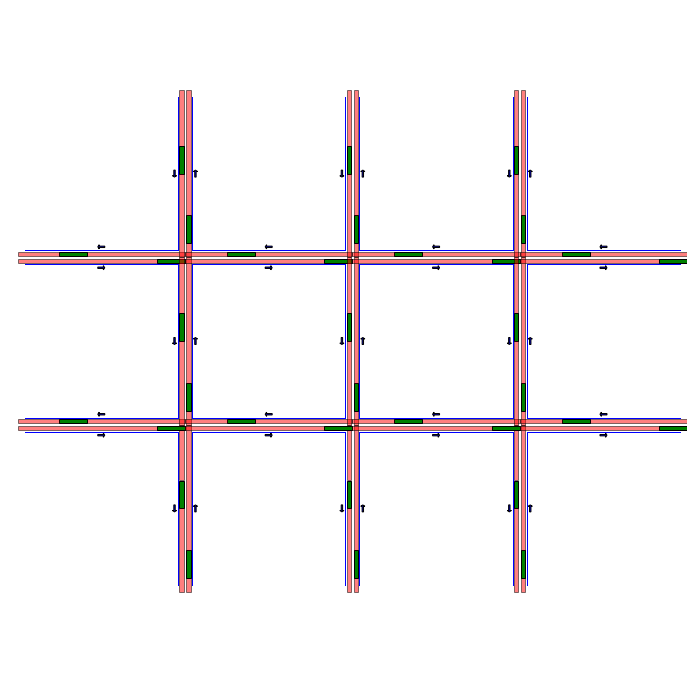

None

In [129]:

def ShowFrame(t):
    fig = plt.figure(figsize=(12, 12))    
    ax = plt.gca()
    ax.set_axis_bgcolor((1, 1, 1))
    PlotRoadGrid(ax, t = t, L=L, w=w)

    plt.axis('equal')
    plt.xlim(0, 4 * L)
    plt.ylim(0, 3 * L)
    plt.axis('off')
    plt.show()
    
interact(ShowFrame, t = (0.0, 4.0, 0.1))

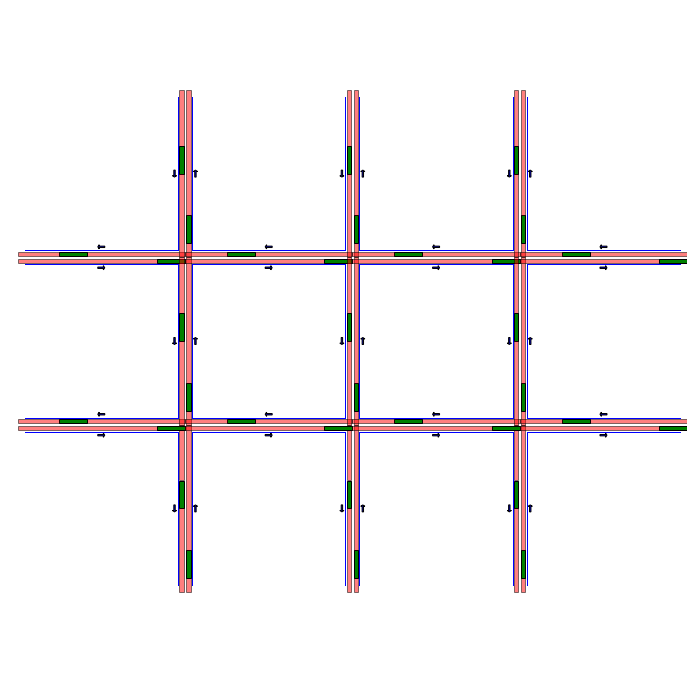

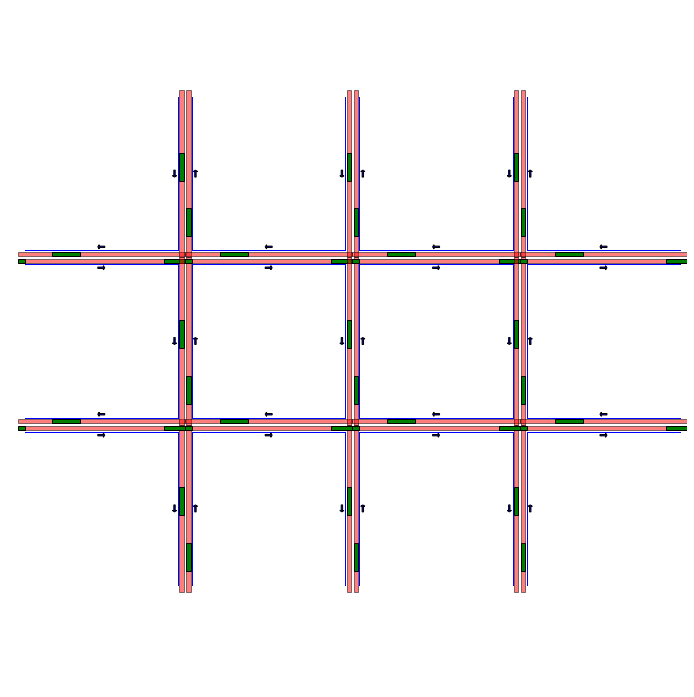

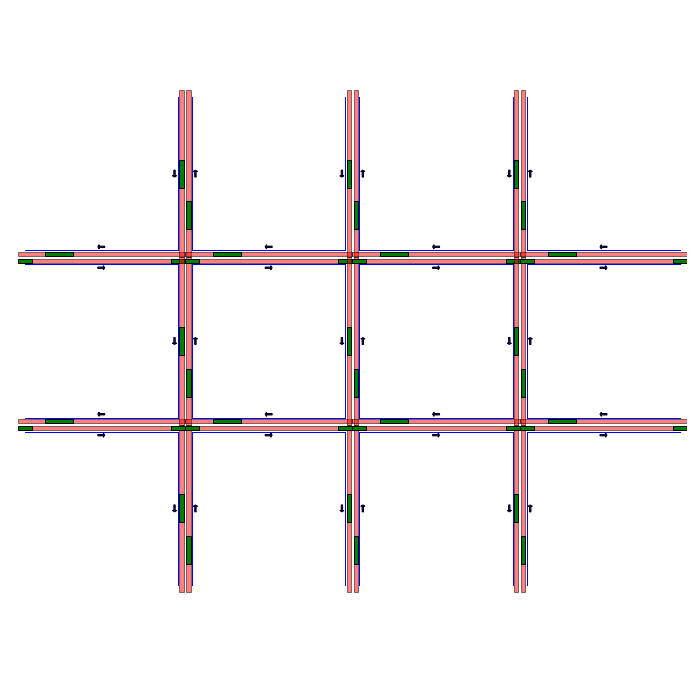

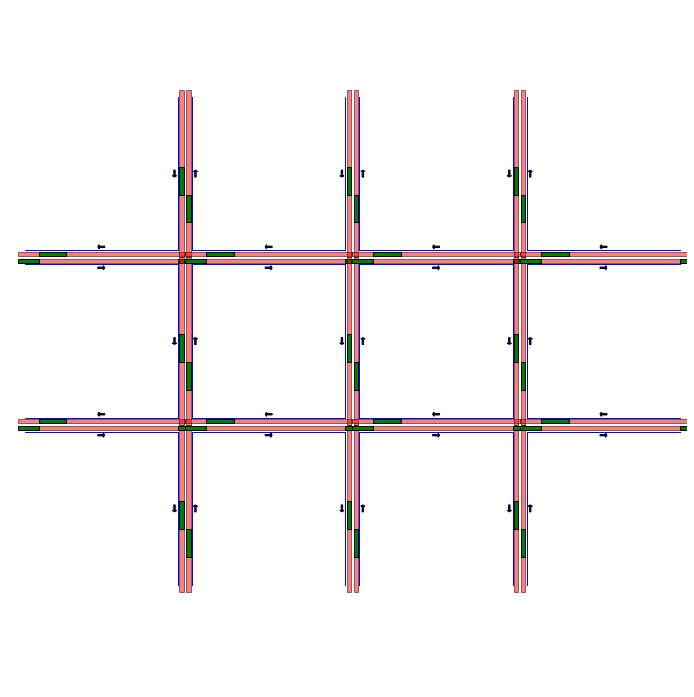

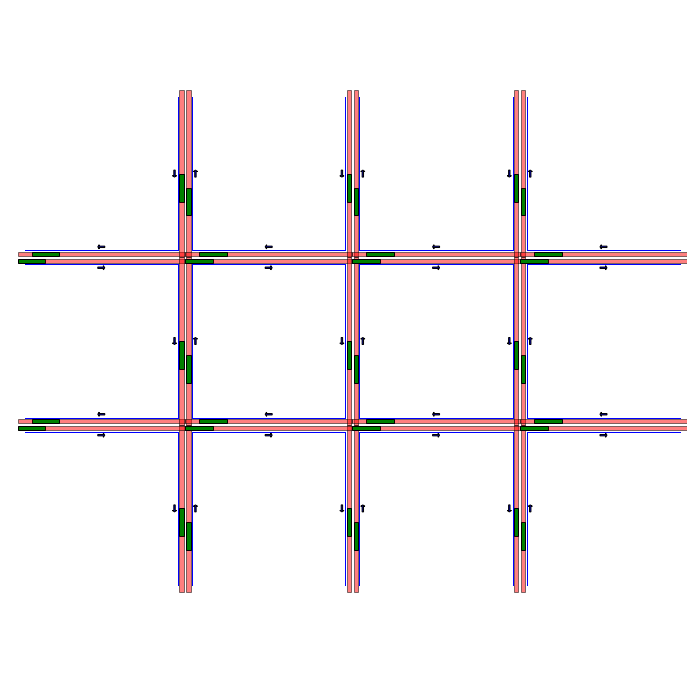

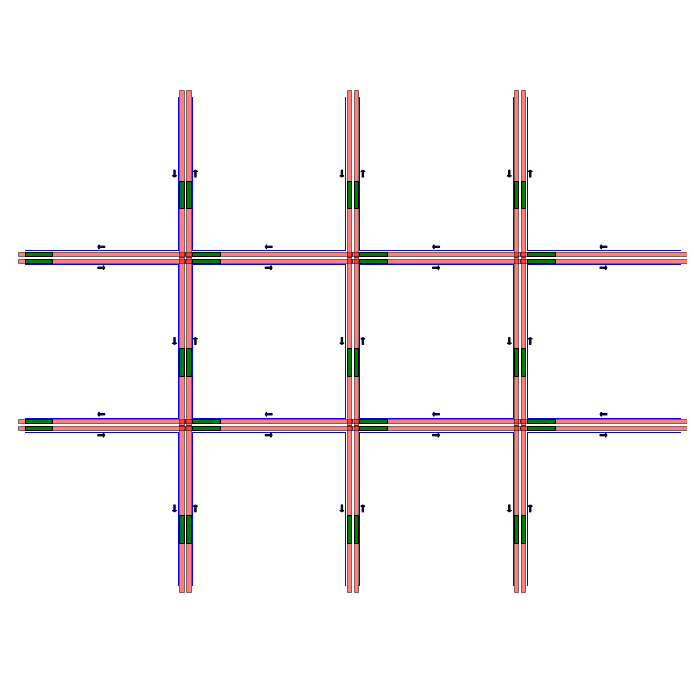

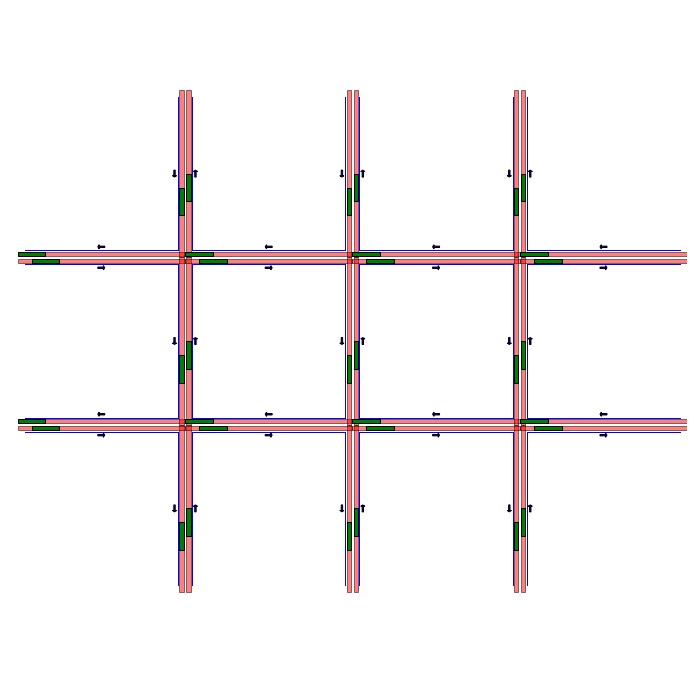

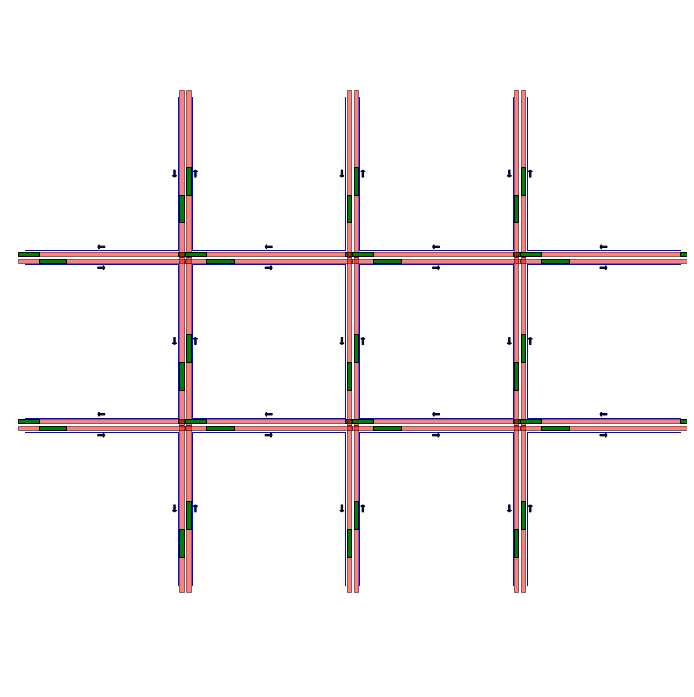

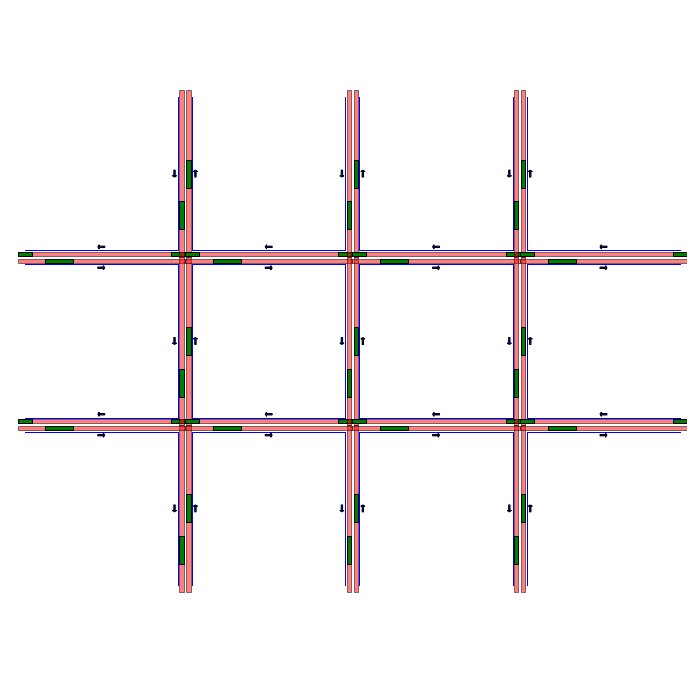

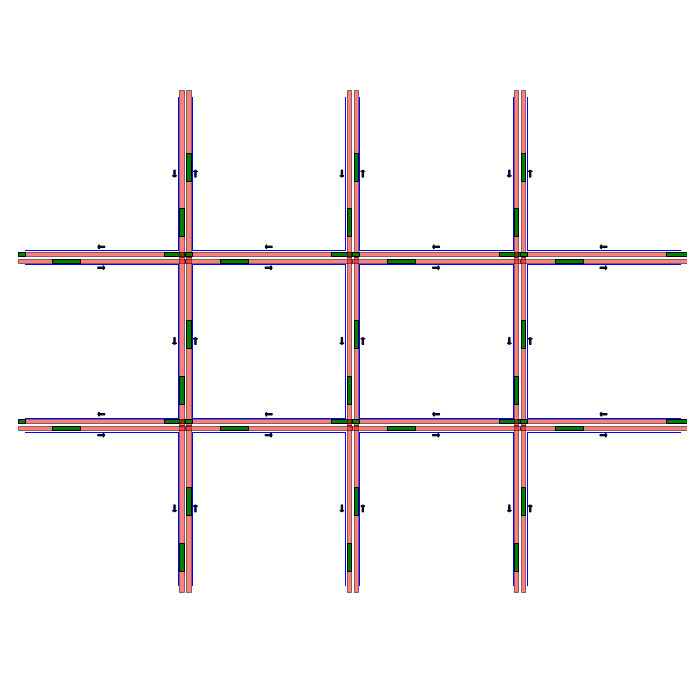

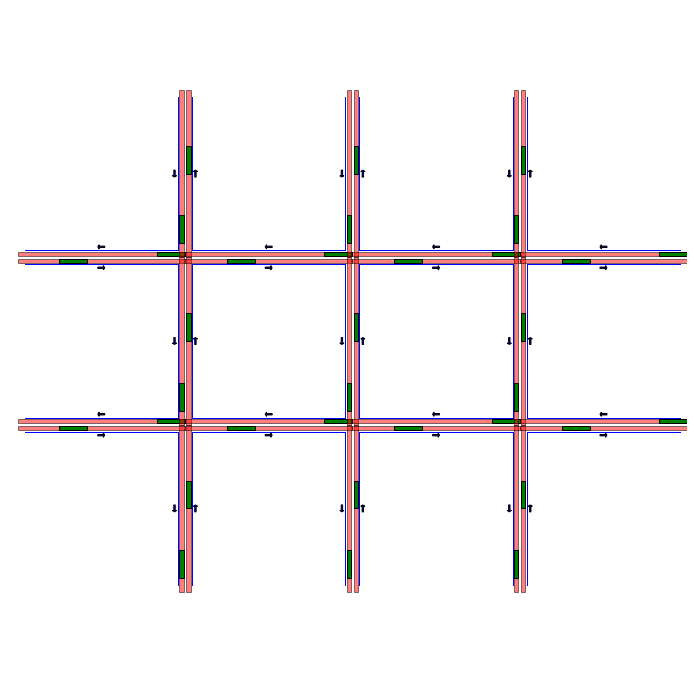

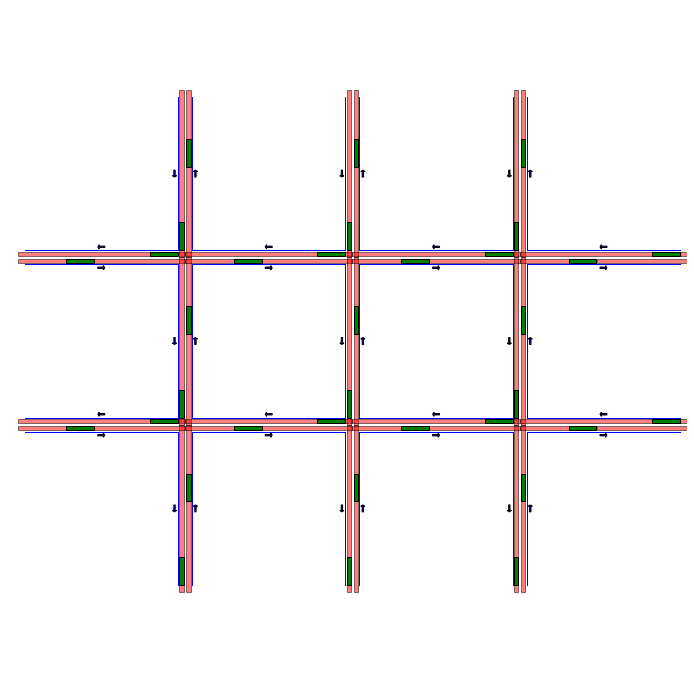

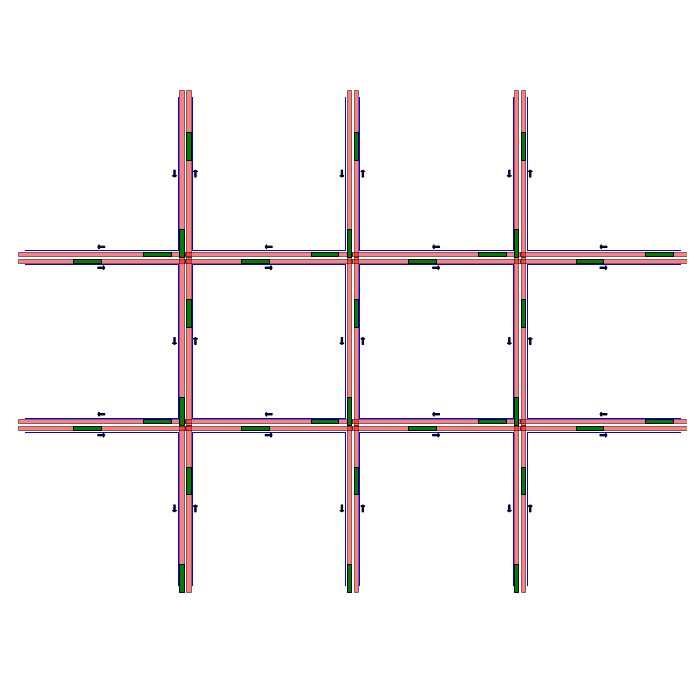

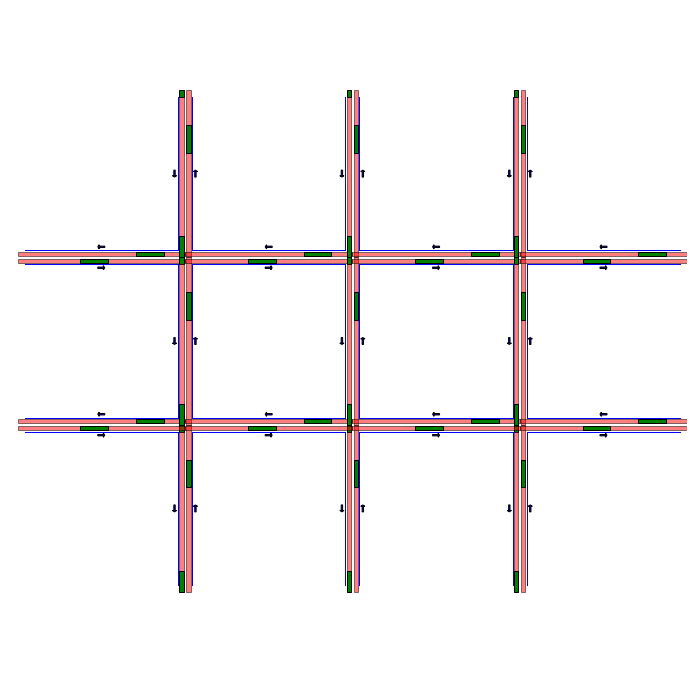

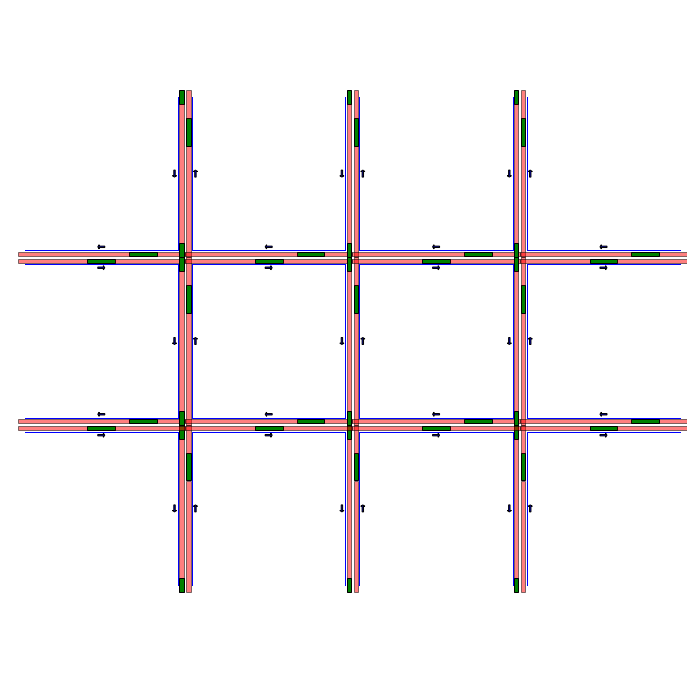

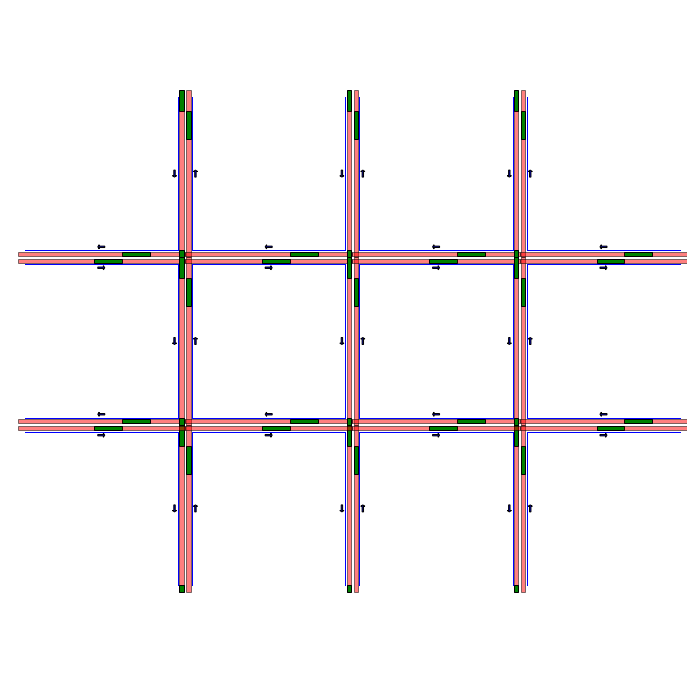

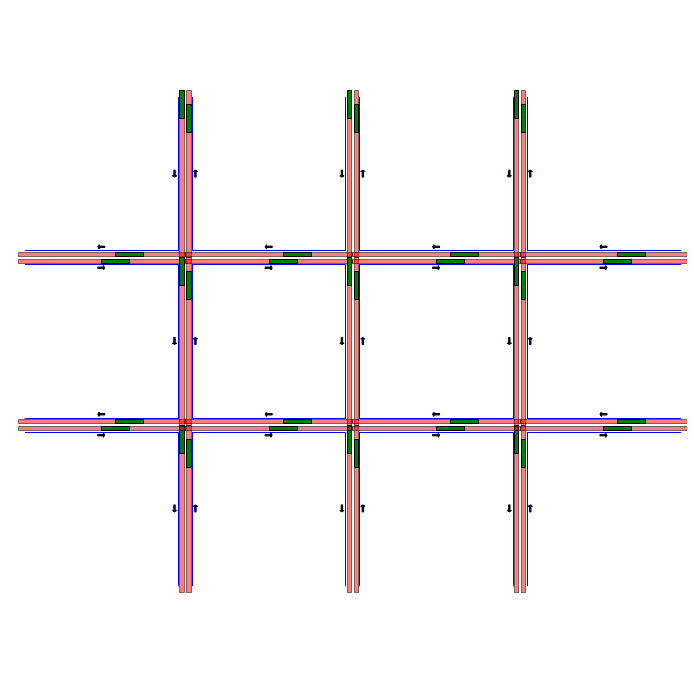

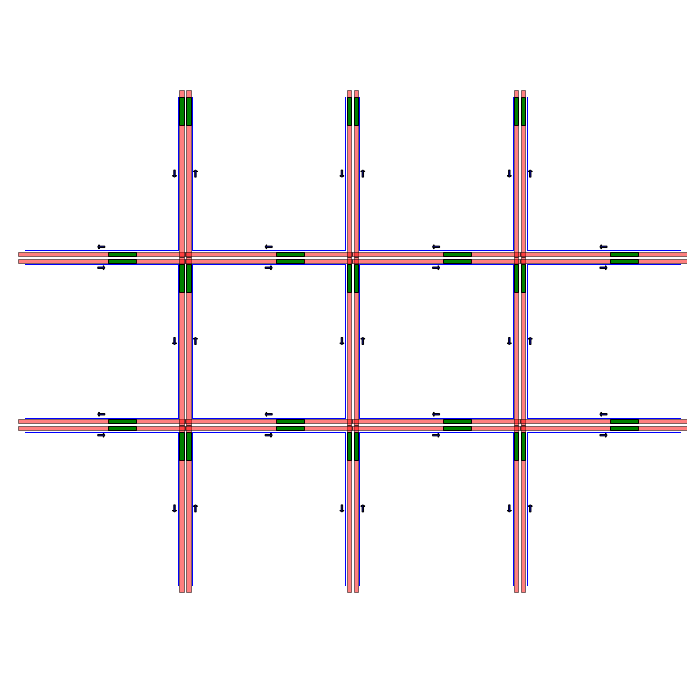

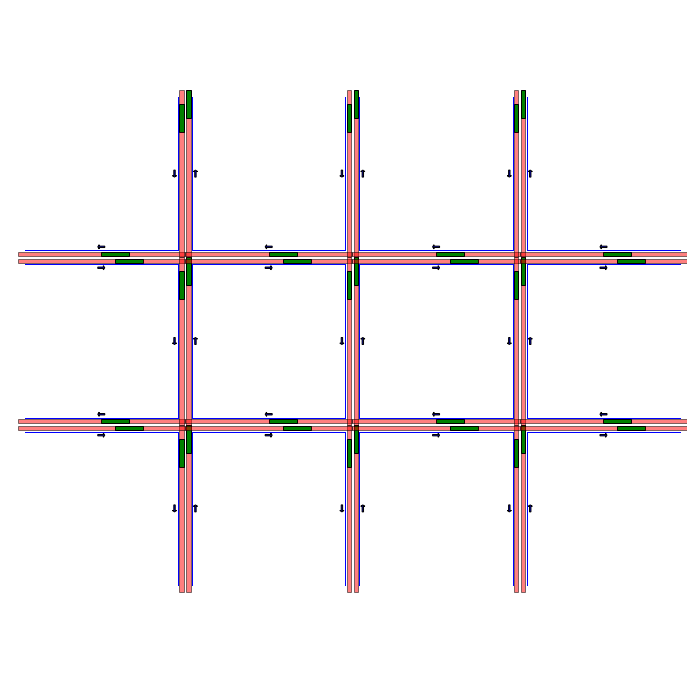

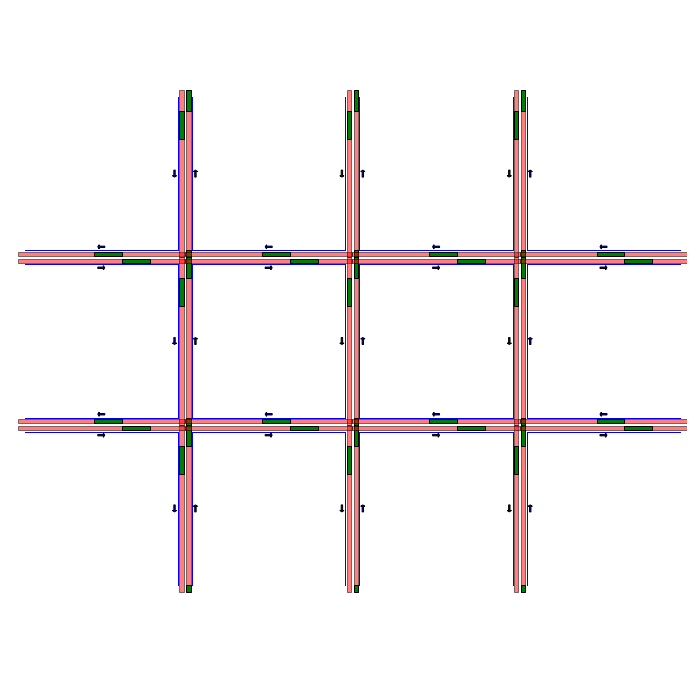

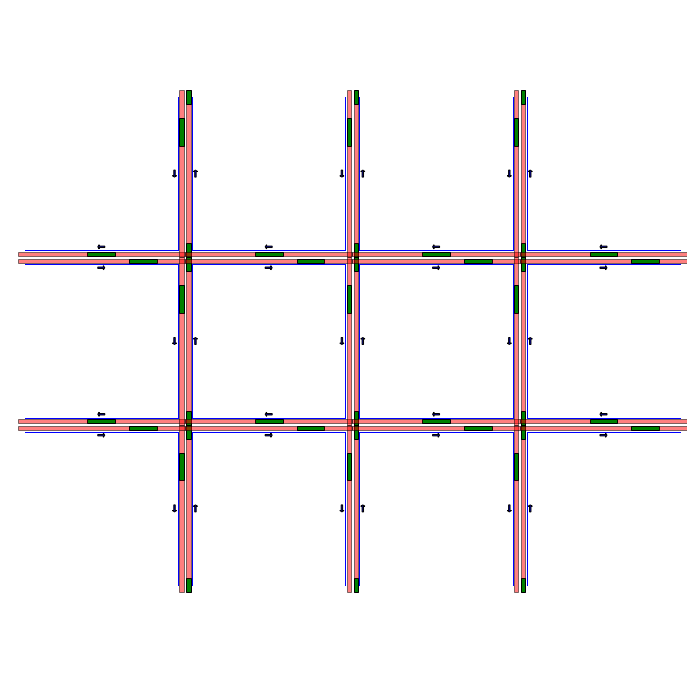

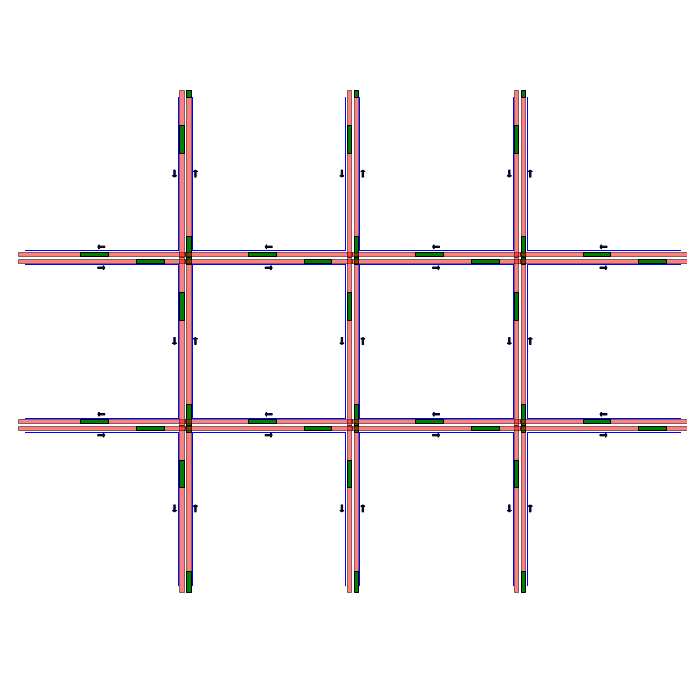

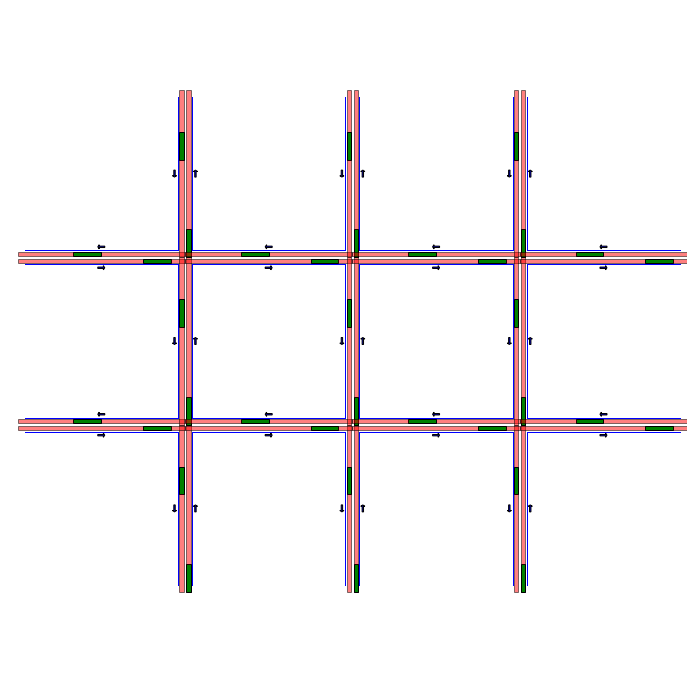

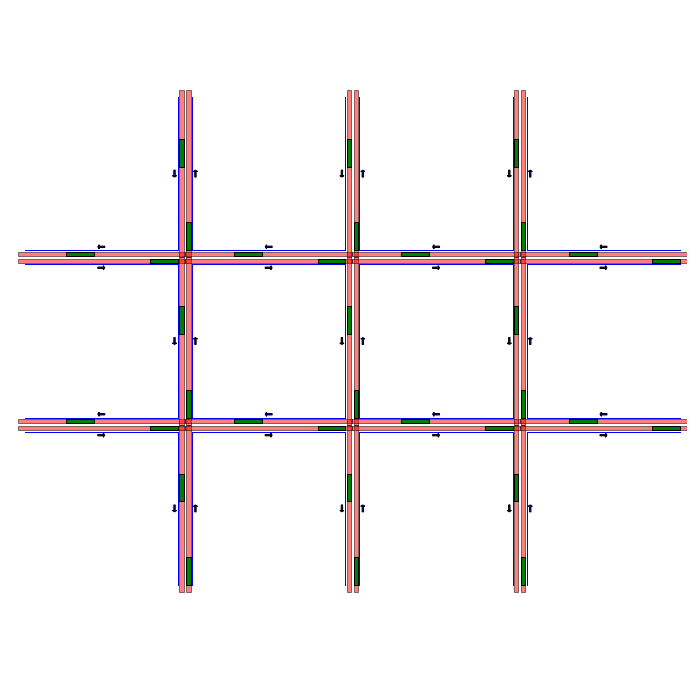

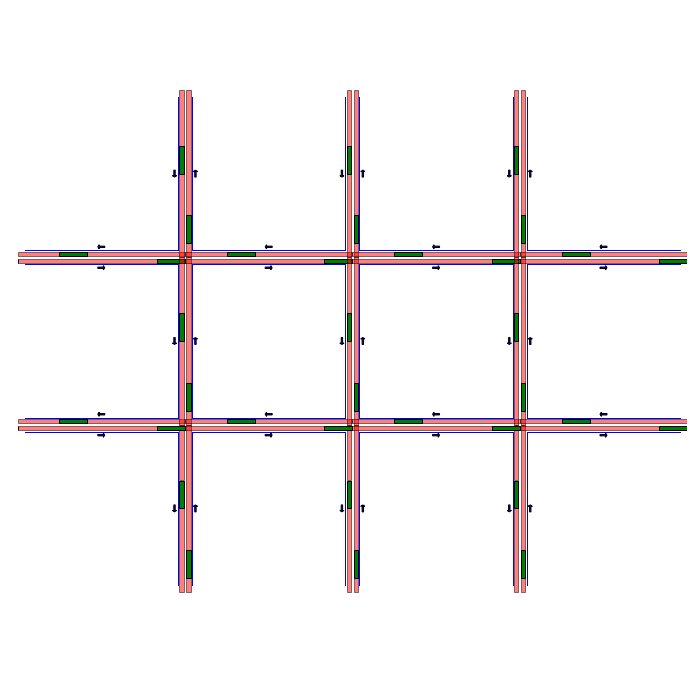

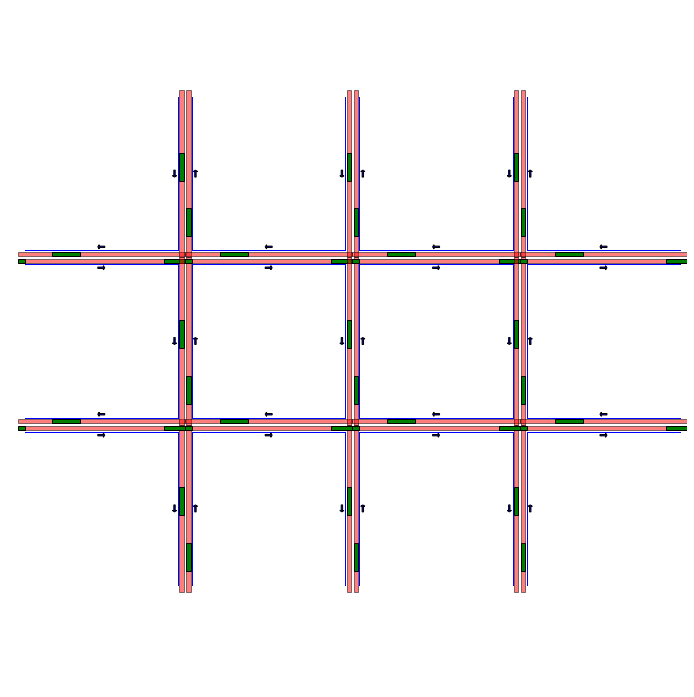

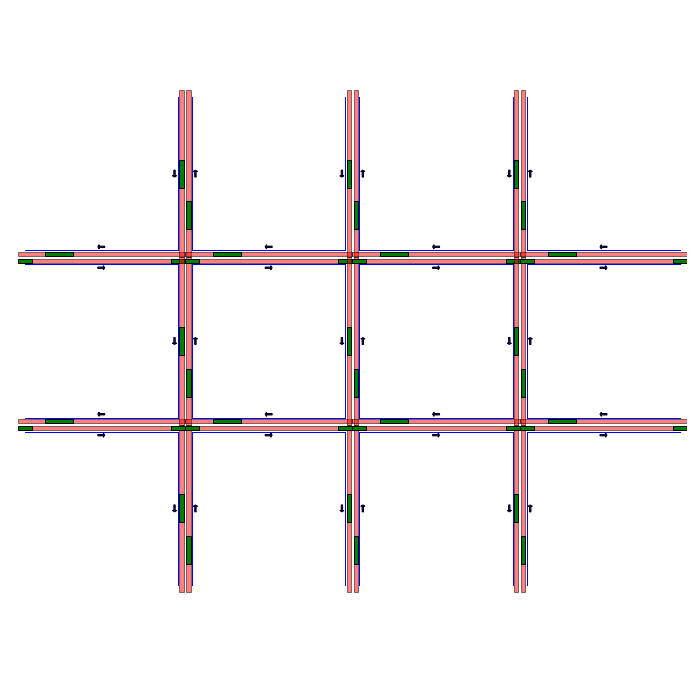

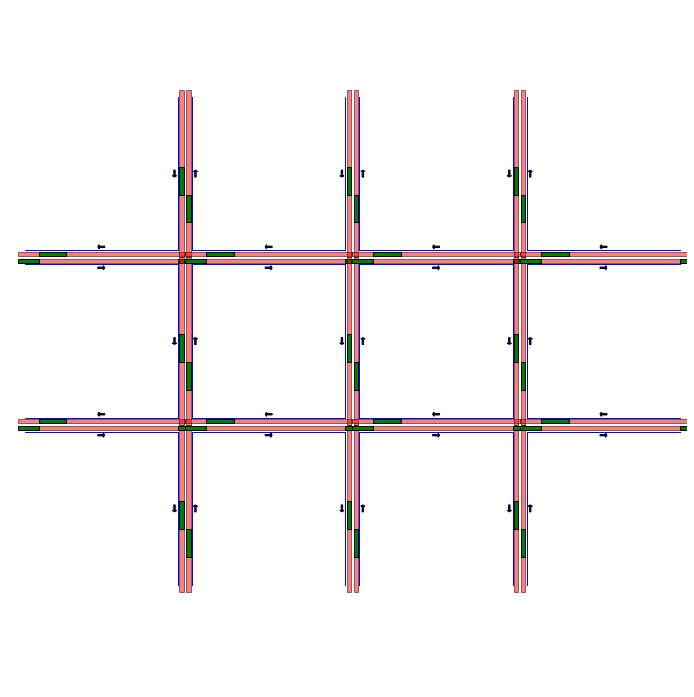

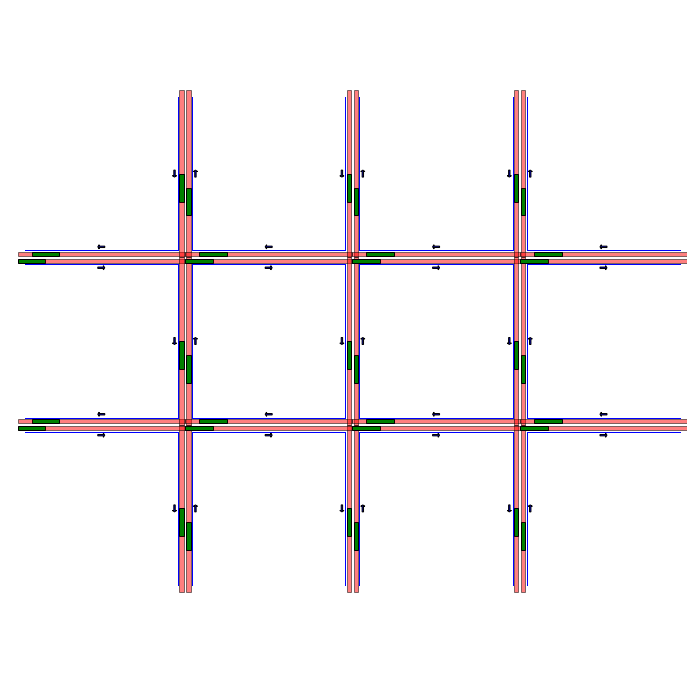

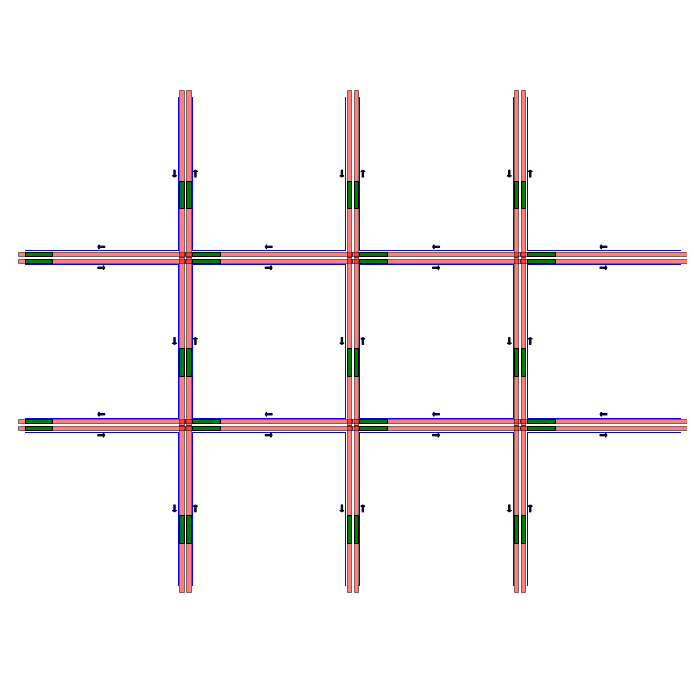

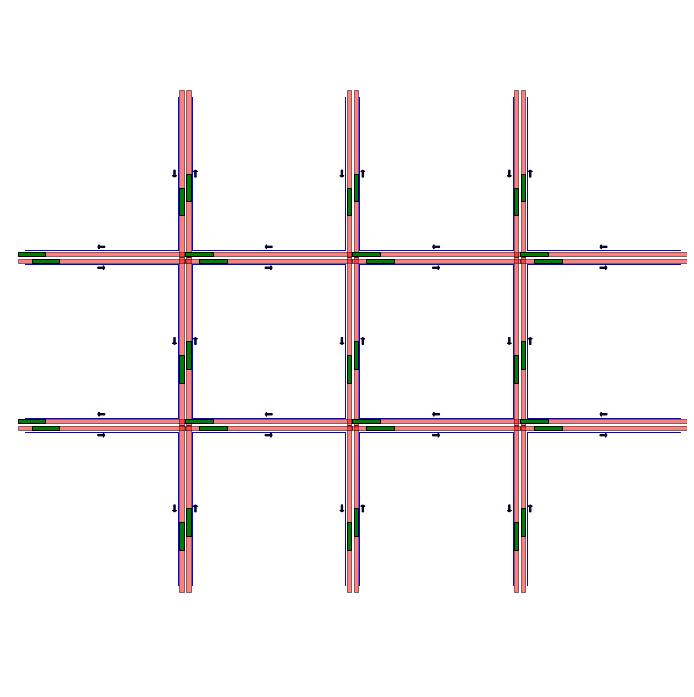

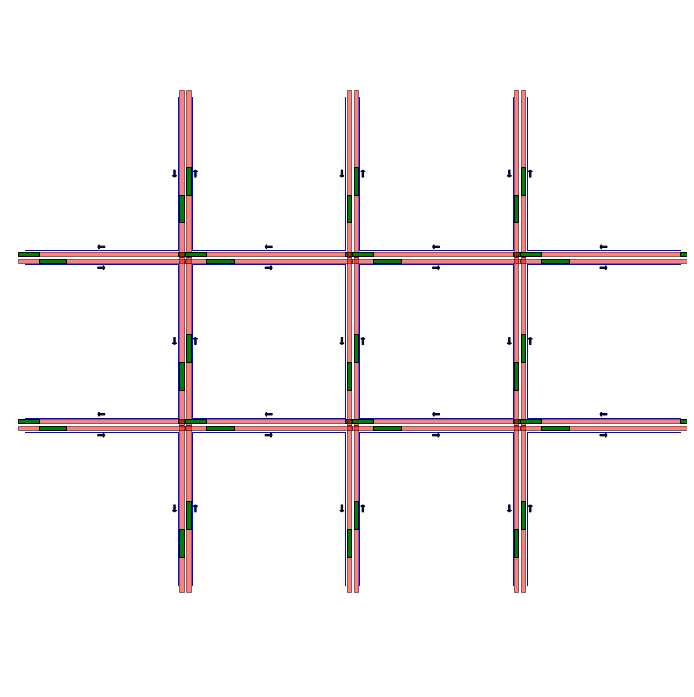

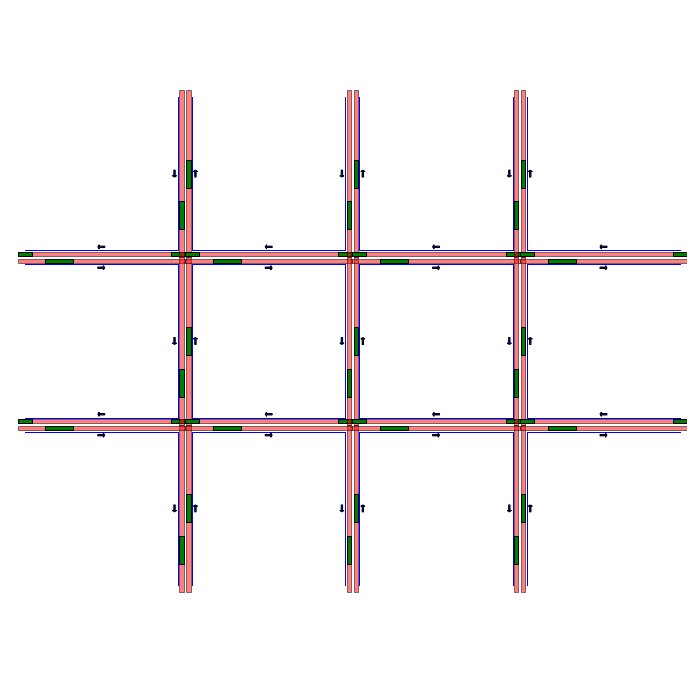

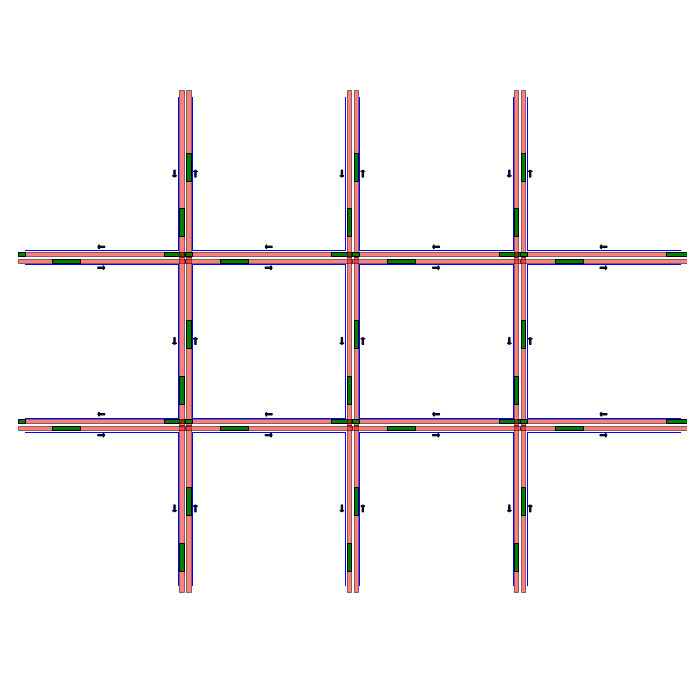

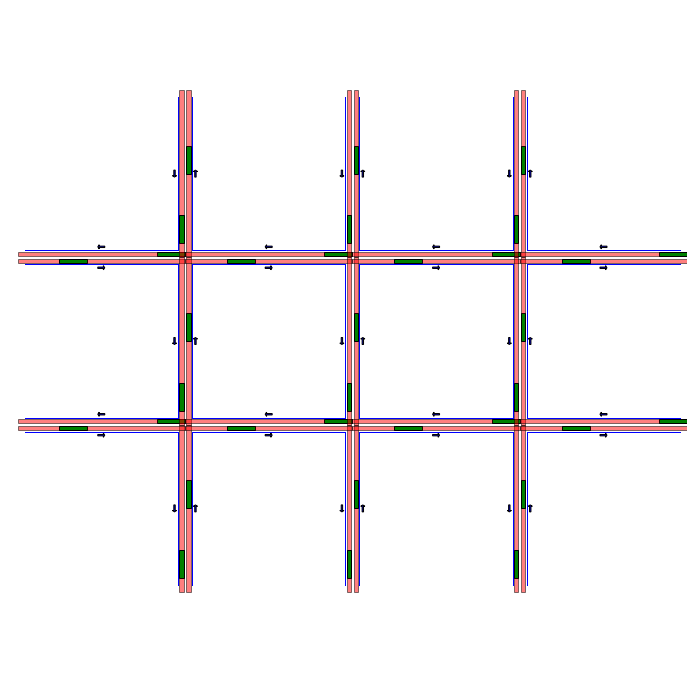

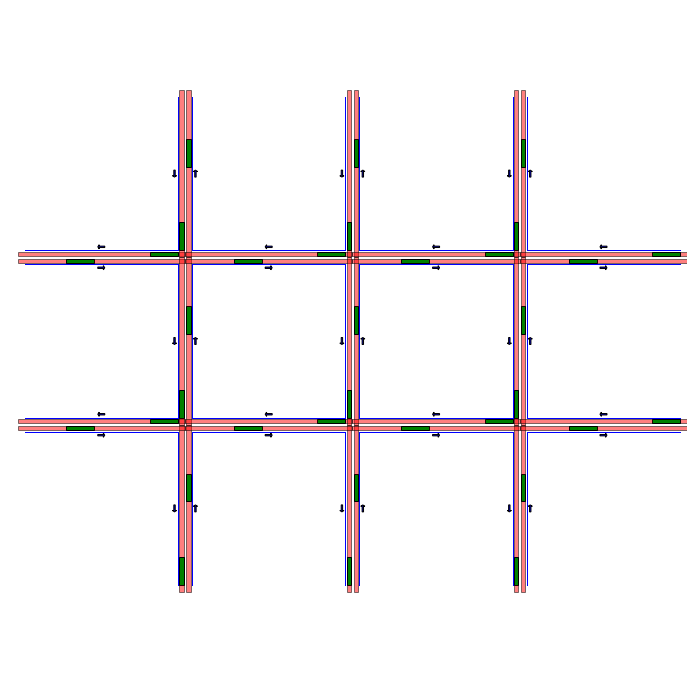

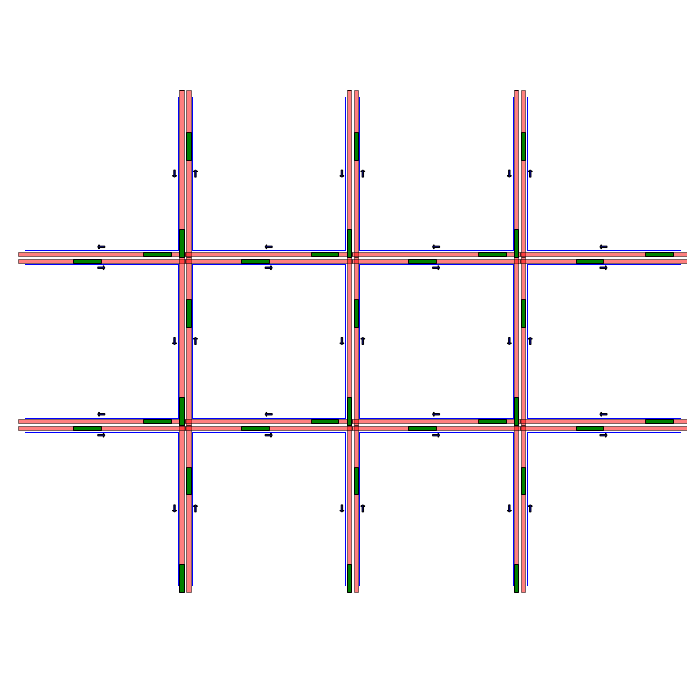

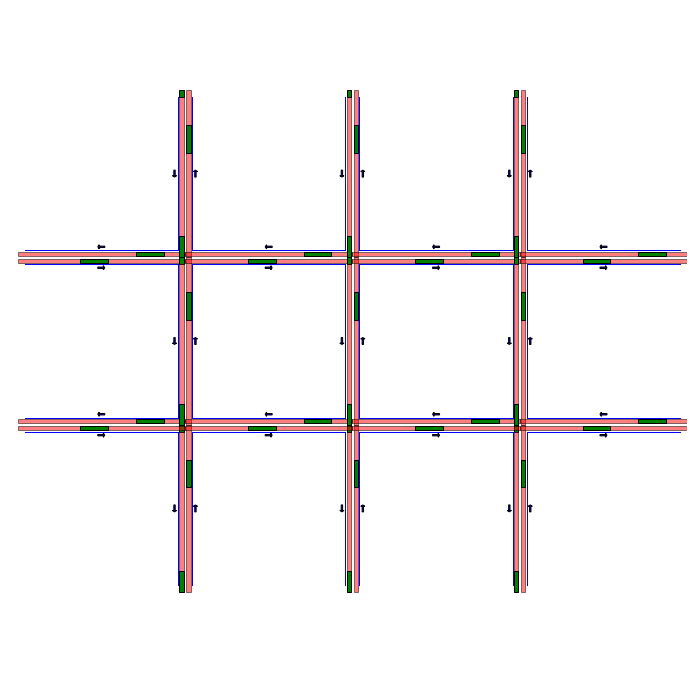

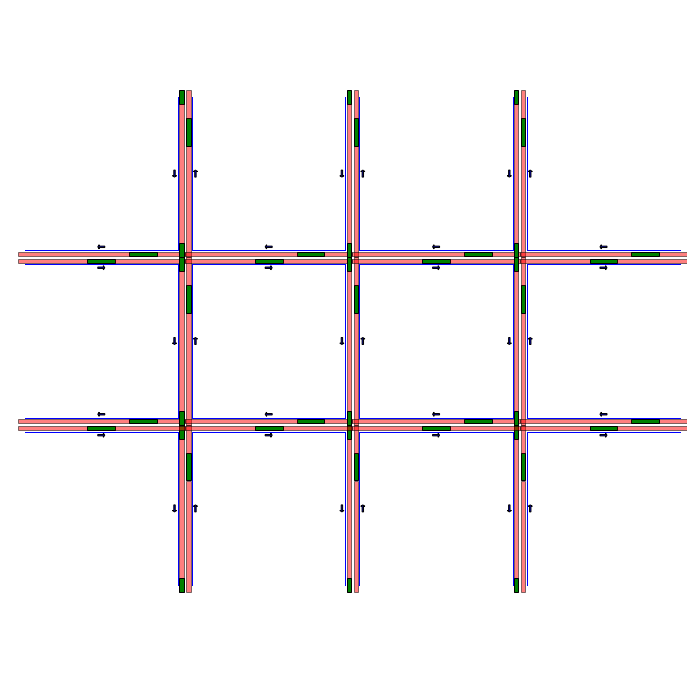

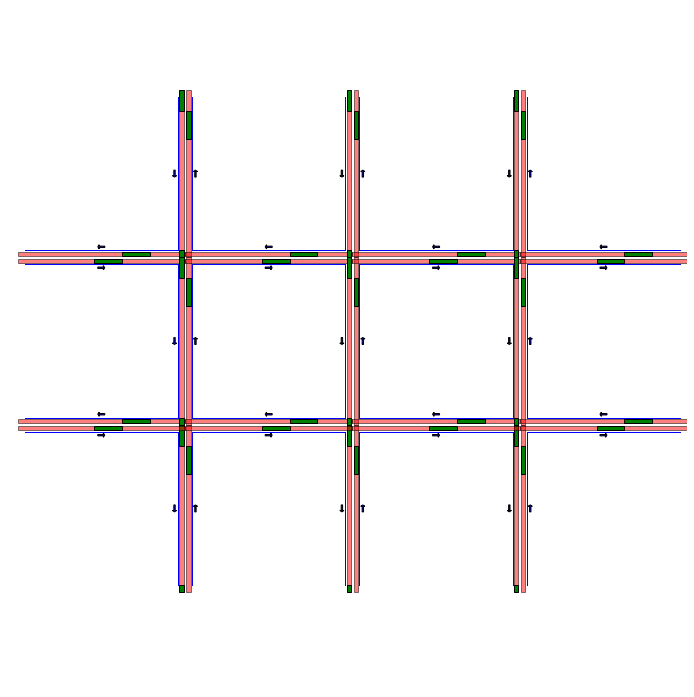

In [131]:
def SaveFrame(i, t):
    fig = plt.figure(figsize=(12, 12))    
    ax = plt.gca()
    ax.set_axis_bgcolor((1, 1, 1))
    PlotRoadGrid(ax, t = t, L=L, w=w)

    plt.axis('equal')
    plt.xlim(0, 4 * L)
    plt.ylim(0, 3 * L)
    plt.axis('off')
    plt.savefig('frame_{}.png'.format(100 + i))

for i, t in enumerate(np.arange(0, 4, 0.1)):
    SaveFrame(i, t)